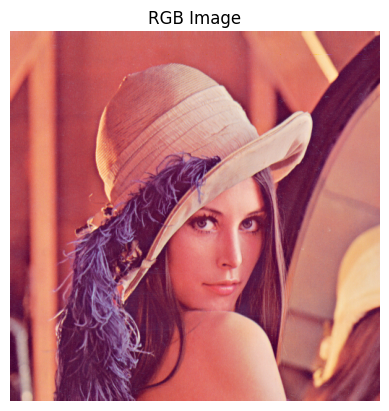

Image Size: 512x512, Channels: 3
Total Pixels: 262144


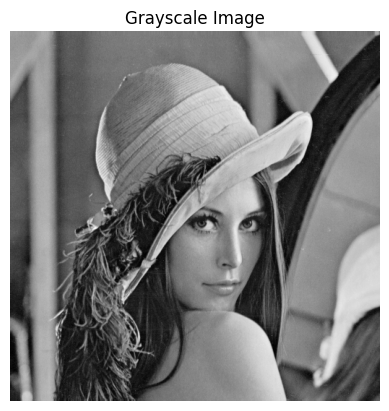

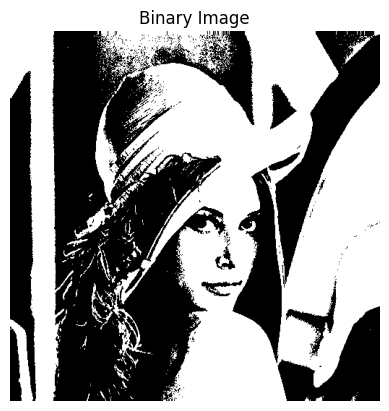

Black Pixels Count: 128178


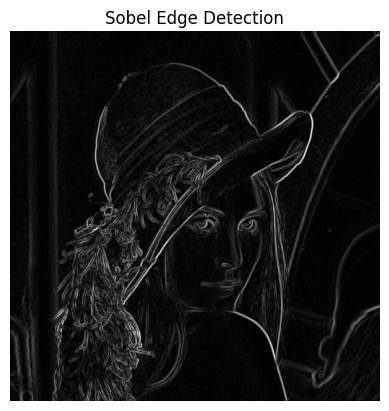

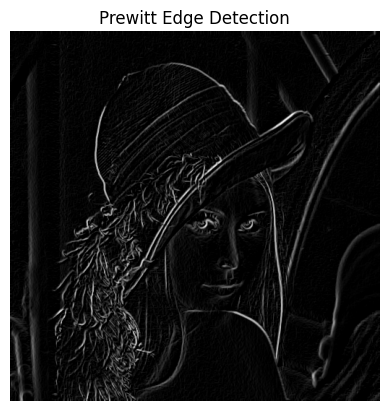

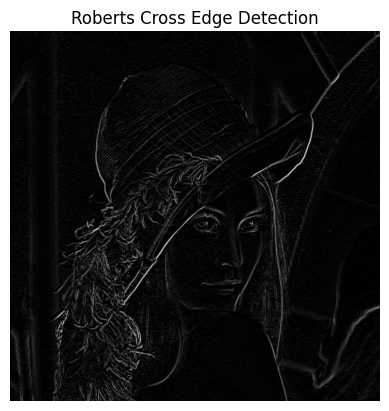

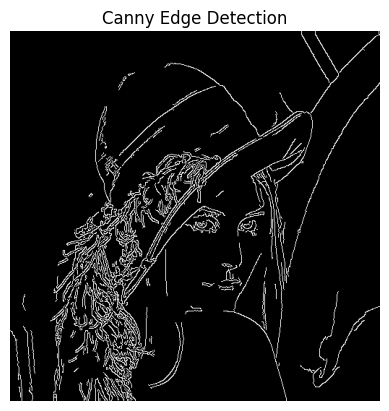

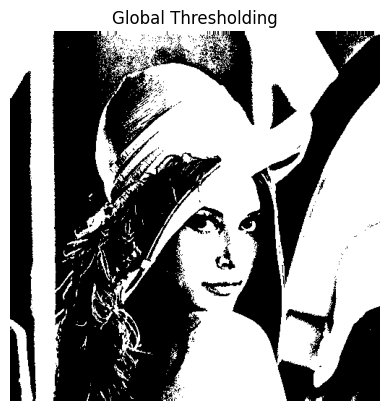

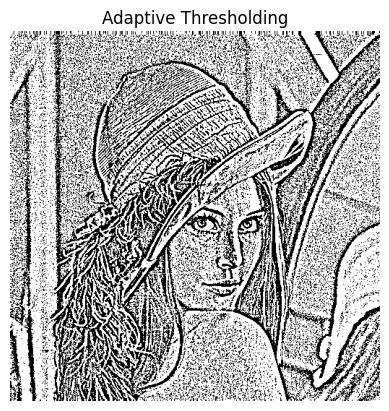

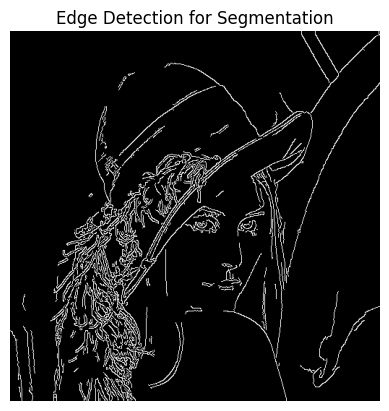

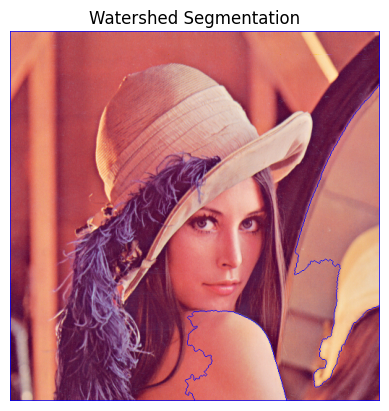

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/Lena.png')  # Change filename accordingly

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imwrite('/content/image_rgb.jpg', image_rgb)


plt.imshow(image_rgb)
plt.title("RGB Image")
plt.axis("off")
plt.show()

height, width, channels = image.shape
print(f"Image Size: {width}x{height}, Channels: {channels}")

total_pixels = width * height
print(f"Total Pixels: {total_pixels}")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/gray_image.jpg', gray_image)

plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
cv2.imwrite('/content/binary_image.jpg', binary_image)

plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

black_pixels = np.sum(binary_image == 0)
print(f"Black Pixels Count: {black_pixels}")

sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis("off")
plt.show()

prewitt_x = cv2.filter2D(gray_image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
prewitt_y = cv2.filter2D(gray_image, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
prewitt_combined = cv2.magnitude(prewitt_x.astype(float), prewitt_y.astype(float))
plt.imshow(prewitt_combined, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis("off")
plt.show()

roberts_x = cv2.filter2D(gray_image, -1, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(gray_image, -1, np.array([[0, 1], [-1, 0]]))
roberts_combined = cv2.magnitude(roberts_x.astype(float), roberts_y.astype(float))
plt.imshow(roberts_combined, cmap='gray')
plt.title("Roberts Cross Edge Detection")
plt.axis("off")
plt.show()

canny_edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()

_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(global_thresh, cmap='gray')
plt.title("Global Thresholding")
plt.axis("off")
plt.show()

adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Thresholding")
plt.axis("off")
plt.show()

plt.imshow(canny_edges, cmap='gray')
plt.title("Edge Detection for Segmentation")
plt.axis("off")
plt.show()

gray_blur = cv2.GaussianBlur(gray_image, (5,5), 0)
_, binary_watershed = cv2.threshold(gray_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
distance_transform = cv2.distanceTransform(binary_watershed, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(distance_transform, 0.7 * distance_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(binary_watershed, sure_fg)
markers = cv2.connectedComponents(sure_fg)[1]
markers += 1
markers[unknown == 255] = 0
image_watershed = image.copy()
markers = cv2.watershed(image_watershed, markers)
image_watershed[markers == -1] = [255, 0, 0]
plt.imshow(cv2.cvtColor(image_watershed, cv2.COLOR_BGR2RGB))
plt.title("Watershed Segmentation")
plt.axis("off")
plt.show()
